# Dynamics of a One-Shot Collective Risk Dilemma - Santos & Pacheco 2011 (PNAS)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import egttools as egt
import seaborn as sns

from matplotlib.ticker import AutoMinorLocator

## Finite Populations - Moran process with pairwise imitation (social learning)

In [2]:
# Parameters and evolver
beta = 5
mu=0
Z = 50
N = 6
M = 3
b = 1
c = 0.1
pop_states = np.arange(0, Z + 1, 1)

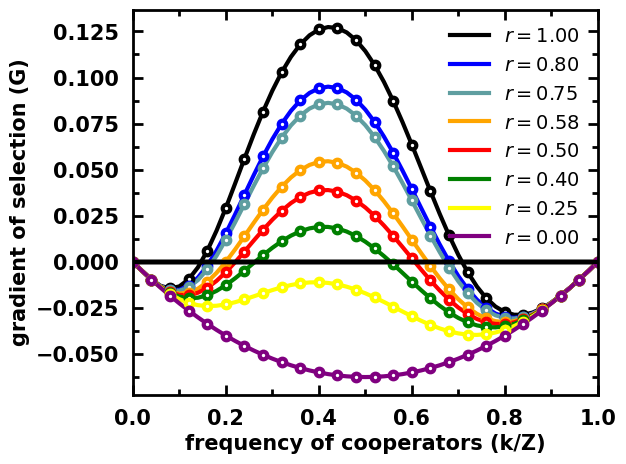

In [3]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red', 'green', 'yellow', 'purple']
risks = [1.0, 0.8, 0.75, 0.58, 0.5, 0.4, 0.25, 0.0]

for i, risk in enumerate(risks):
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    gradients = np.array([[evolver.calculate_gradient_of_selection(beta, egt.sample_simplex(index, Z, 2))[1]]
                          for index in range(egt.calculate_nb_states(Z, 2))])
    egt.plotting.indicators.plot_gradients(gradients,  
                                       marker_facecolor='white',
                                       xlabel="frequency of cooperators (k/Z)", marker="o", 
                                           marker_size=30, marker_plot_freq=2, 
                                           linelabel="$r={:.2f}$".format(risk), 
                                           marker_edgecolor=colors[i], color=colors[i], ax=ax)

ax.legend(frameon=False, fontsize=14)

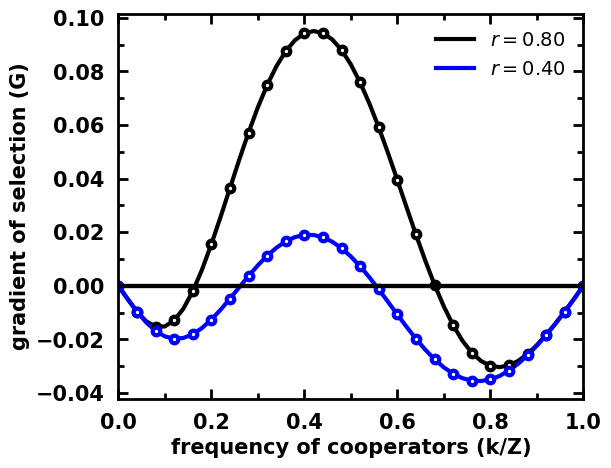

In [4]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ['black', 'blue']
risks = [0.8, 0.4]

for i, risk in enumerate(risks):
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    gradients = np.array([[evolver.calculate_gradient_of_selection(beta, egt.sample_simplex(index, Z, 2))[1]]
                          for index in range(egt.calculate_nb_states(Z, 2))])
    egt.plotting.indicators.plot_gradients(gradients,  
                                       marker_facecolor='white',
                                       xlabel="frequency of cooperators (k/Z)", marker="o", 
                                           marker_size=30, marker_plot_freq=2, 
                                           linelabel="$r={:.2f}$".format(risk), 
                                           marker_edgecolor=colors[i], color=colors[i], ax=ax)

ax.legend(frameon=False, fontsize=14)

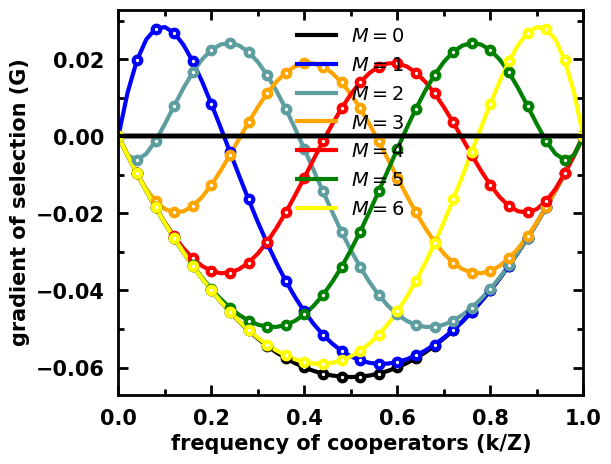

In [5]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red', 'green', 'yellow', 'purple']
Ms = [0, 1, 2, 3, 4, 5, 6]

for i, M in enumerate(Ms):
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.StochDynamics(game.nb_strategies(), game.payoffs(),  Z, group_size=N, mu=0)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    gradients = np.array([[evolver.calculate_gradient_of_selection(beta, egt.sample_simplex(index, Z, 2))[1]]
                          for index in range(egt.calculate_nb_states(Z, 2))])
    egt.plotting.indicators.plot_gradients(gradients,  
                                       marker_facecolor='white',
                                       xlabel="frequency of cooperators (k/Z)", marker="o", 
                                           marker_size=30, marker_plot_freq=2, 
                                           linelabel="$M={}$".format(M), 
                                           marker_edgecolor=colors[i], color=colors[i], ax=ax)

ax.legend(frameon=False, fontsize=14)

(0.0, 0.13)

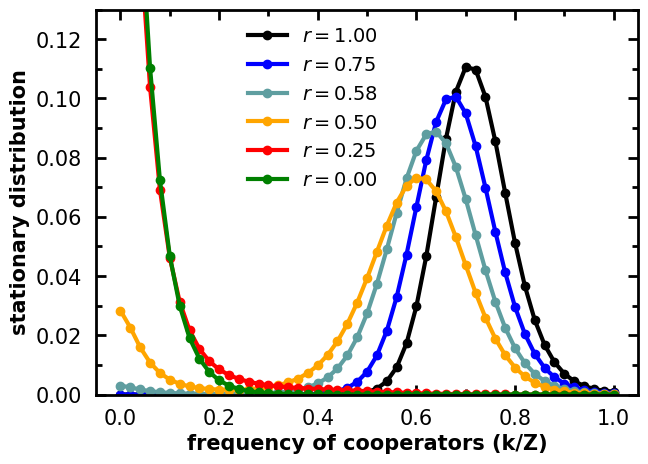

In [6]:
fig, ax = plt.subplots(figsize=(7,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red', 'green']
risks = [1.0, 0.75, 0.58, 0.5, 0.25, 0.0]
Z = 50
N = 6
M = 3
b = 1
c = 0.1
x = np.arange(0, Z + 1) / Z
beta = 5
mu = 0.01

for i, risk in enumerate(risks):
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$r={:.2f}$".format(risk), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.4, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.13)

(0.0, 0.14)

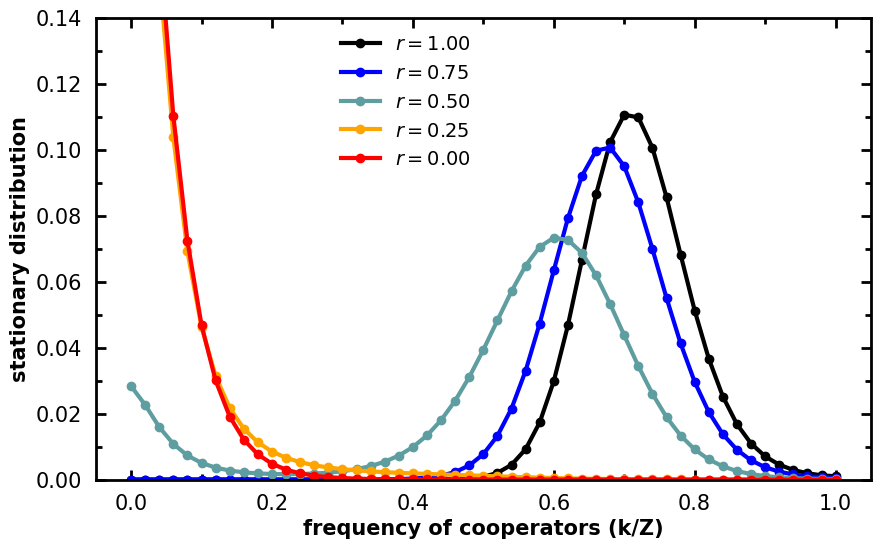

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red']
risks = [1.0, 0.75, 0.5, 0.25, 0.0]
Z = 50
N = 6
M = 3
b = 1
c = 0.1
x = np.arange(0, Z + 1) / Z
beta = 5
mu = 0.01

for i, risk in enumerate(risks):
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$r={:.2f}$".format(risk), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.4, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.14)

## Effect of population size ($Z$)

(0.0, 0.13)

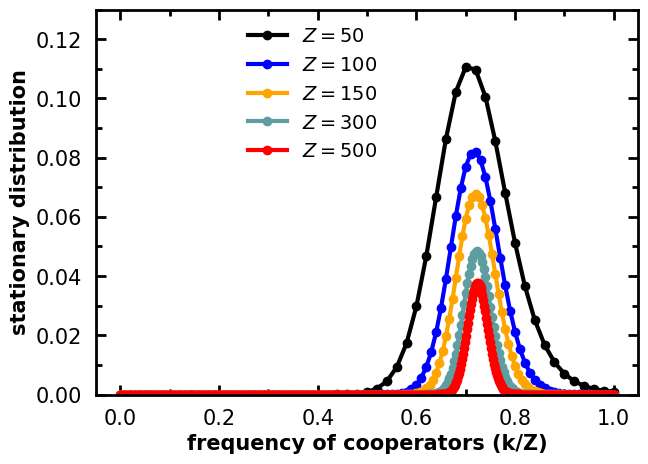

In [8]:
fig, ax = plt.subplots(figsize=(7,5))

colors = ['black', 'blue', 'orange', 'cadetblue', 'red']
risk = 1.0
Zs = [50, 100, 150, 300, 500]
N = 6
M = 3
b = 1
c = 0.1
beta = 5
mu = 0.01

for i, Z in enumerate(Zs):
    x = np.arange(0, Z + 1) / Z
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$Z={}$".format(Z), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.4, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.13)

(0.0, 0.13)

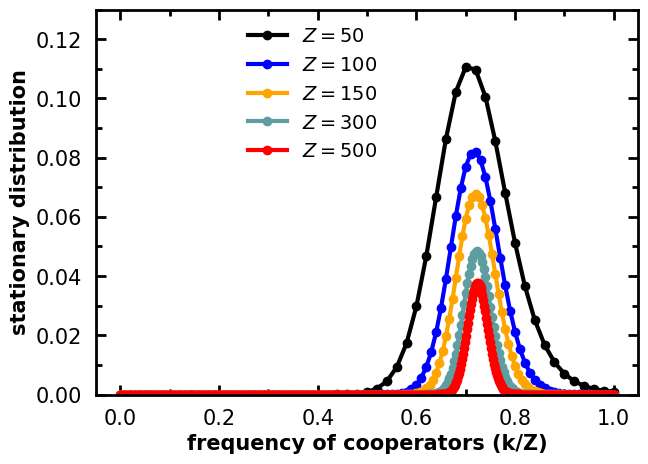

In [9]:
fig, ax = plt.subplots(figsize=(7,5))

colors = ['black', 'blue', 'orange', 'cadetblue', 'red']
risk = 1.0
Zs = [50, 100, 150, 300, 500]
N = 6
M = 3
b = 1
c = 0.1
beta = 5
mu = 0.01

for i, Z in enumerate(Zs):
    x = np.arange(0, Z + 1) / Z
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$Z={}$".format(Z), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.4, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.13)

## Effect of group size ($N$)

(0.0, 0.17)

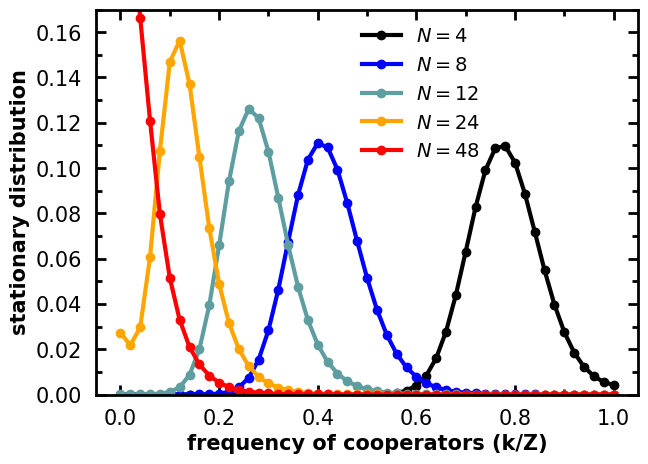

In [10]:
fig, ax = plt.subplots(figsize=(7,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red']
risk = 1.0
Ns = [4, 8, 12, 24, 48]
Z = 50
M = 2
b = 1
c = 0.1
beta = 5
mu = 0.01

for i, N in enumerate(Ns):
    x = np.arange(0, Z + 1) / Z
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$N={}$".format(N), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.6, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.17)

## Effect of Intensity of Selection ($\beta$)

(0.0, 0.17)

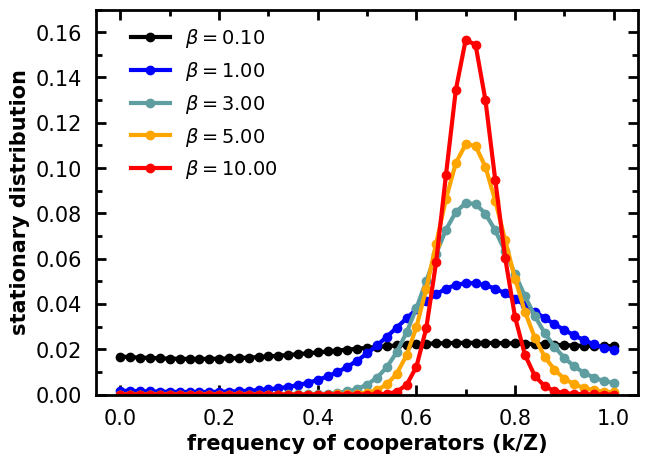

In [11]:
fig, ax = plt.subplots(figsize=(7,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red']
risk = 1.0
Z = 50
N = 6
M = 3
b = 1
c = 0.1
betas = [0.1, 1, 3, 5, 10]
mu = 0.01

for i, beta in enumerate(betas):
    x = np.arange(0, Z + 1) / Z
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$\\beta={:.2f}$".format(beta), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.2, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.17)

## Effect of mutation rate ($\mu$)

(0.0, 0.17)

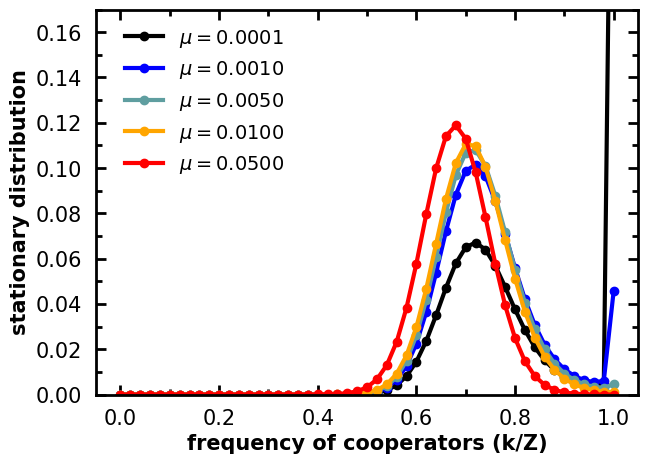

In [12]:
fig, ax = plt.subplots(figsize=(7,5))

colors = ['black', 'blue', 'cadetblue', 'orange', 'red']
risk = 1.0
Z = 50
N = 6
M = 3
b = 1
c = 0.1
beta = 5
mus = [0.0001, 0.001, 0.005, 0.01, 0.05]

for i, mu in enumerate(mus):
    x = np.arange(0, Z + 1) / Z
    game = egt.games.OneShotCRD(b, c, risk, N, M)
    evolver = egt.analytical.PairwiseComparison(Z, game)
    transitions = evolver.calculate_transition_matrix(beta, mu)
    sd = egt.utils.calculate_stationary_distribution(transitions.transpose())
    ax.plot(x, sd, label="$\\mu={:.4f}$".format(mu), marker="o", color=colors[i], linewidth=3)

ax.legend(frameon=False, fontsize=14, bbox_to_anchor=(0.2, 1), loc='upper center')
ax.set_ylabel("stationary distribution", fontsize=15, fontweight='bold')
ax.set_xlabel("frequency of cooperators (k/Z)", fontsize=15, fontweight='bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='both', left=True, bottom=True, top=True, right=True, labelleft=True,
               labelbottom=True,
               width=2,
               labelsize=15, direction='in', pad=10)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.set_ylim(0, 0.17)